<a href="https://colab.research.google.com/github/mezkymy/global-salaries/blob/main/global-salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Salaries
source: https://ai-jobs.net/salaries/download/


### Data Description (from source)



> "We collect salary information anonymously from professionals and employers all over the world and make it publicly available for anyone to use, share and play around with.
> Our goal is to have open salary data for everyone. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to switch careers can make better decisions."


In [15]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# load data
account = 'mezkymy'
repo = 'global-salaries'
branch = 'main'
data_file_name = 'salaries.csv'

url = str(f'https://raw.githubusercontent.com/{account}/{repo}/{branch}/{data_file_name}')

raw_data = pd.read_csv(url)
df = raw_data.copy()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M


## Preliminary Data Exploration

In [17]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [18]:
# check values distribution on numerical data
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8805.000000,8.805000e+03,8805.000000,8805.000000
mean,2022.737422,1.747287e+05,149488.265645,38.693924
std,0.542484,4.560690e+05,64222.105058,48.068060
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.055000e+05,105000.000000,0.000000
50%,2023.000000,1.441000e+05,142200.000000,0.000000
75%,2023.000000,1.900000e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,615201.000000,100.000000


## Remote Ratio

In [19]:
df.remote_ratio.unique()

array([  0, 100,  50])

Based on the data source and also by checking the data directly, we can see that `remote_ratio` only have three unique values: 0, 50, and 100. This data can be treated as categorical rather than numerical. 0 means up to 20% remote work, while 100 means more than 80% remote work. To avoid confusion with this numerical category, this will be renamed to onsite, hybrid, and remote.

In [20]:
cond = [df.remote_ratio < 50, df.remote_ratio > 50]
val = ['onsite', 'remote']

df['remote_cat'] = np.select(cond, val, 'hybrid')
pd.value_counts(df.remote_cat)

onsite    5289
remote    3298
hybrid     218
Name: remote_cat, dtype: int64

## Experience Level, Employment Type, and Company Size

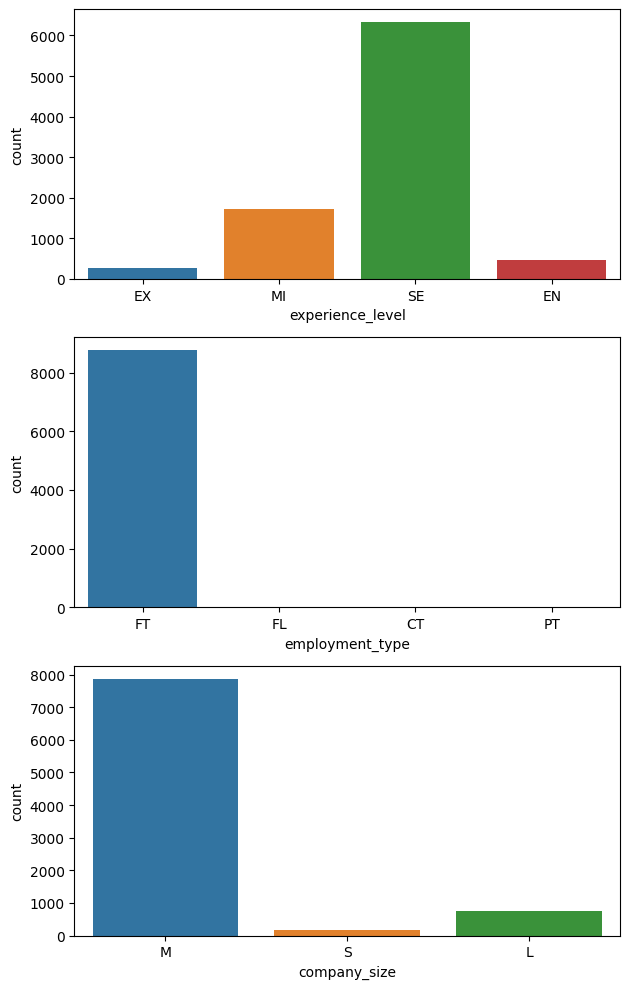

In [21]:
# show count plot based on experience level, employment type, and company size
columns = df.columns
cat = [columns[1], columns[2], columns[10]]
i = 0

fig, axes = plt.subplots(len(cat))

for col in cat:
    sns.countplot(df, ax=axes[i], x=col)
    i += 1

fig.set_figheight(10)
fig.tight_layout()
plt.show()

In [22]:
df.employment_type.value_counts()

FT    8762
CT      18
PT      13
FL      12
Name: employment_type, dtype: int64

Based on employment type, almost all jobs in this dataset are categorized as full-time (FT); while contract, part-time, and full-time jobs only occurs less than 20 times each. The overwhelming discrepancy and the lacking amount of data samples on the three minority categories should be considered when analyzing this dataset. To simplify analysis and also to avoid biases, **only full-time jobs will be analyzed further**.

Based on experience level and company size, there is one category on both variables that is significantly larger in their number of samples than the rest of categories, but other categories still have a decent amount of samples.

In [23]:
df2 = df[df['employment_type'] == 'FT']

## Job Salaries

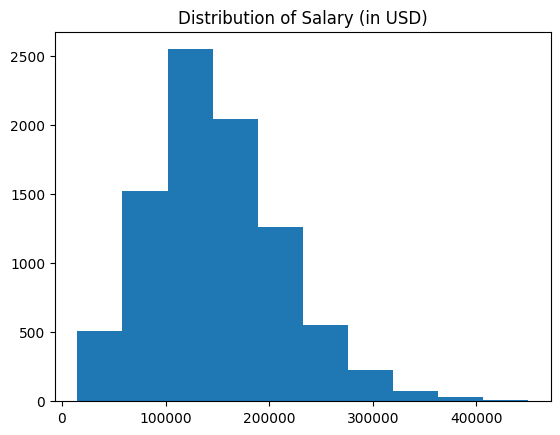

In [24]:
# salary distribution
plt.hist(df2.salary_in_usd)

plt.title('Distribution of Salary (in USD)')
plt.show()

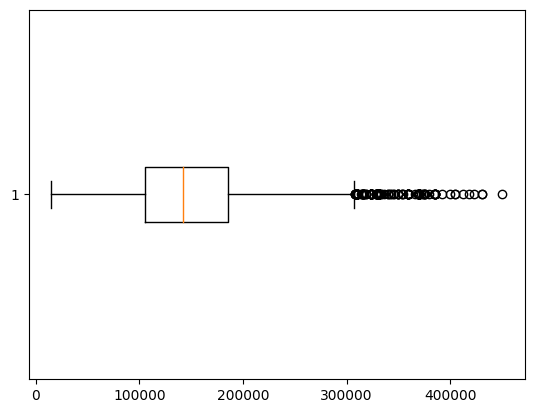

In [25]:
plt.boxplot(df2.salary_in_usd, vert=False)
plt.show()

Based on the distribution, most salaries in the dataset falls between 100K to 200K USD, while there are only a small amount of outliers with salaries above 300K. This is range of salaries combined from all job titles and experience levels. A more detailed analysis on salaries based on job titles and experience levels can be seen further down below, after the analysis on job titles and experience levels.

## Job Titles

In [26]:
# count the number of unique job titles
print(df2.job_title.nunique())
df.job_title.unique()

121


array(['Data Science Director', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Specialist', 'Data Scientist',
       'ML Engineer', 'Data Engineer', 'Data Analyst', 'Data Architect',
       'Data Product Manager', 'Analytics Engineer',
       'Business Intelligence Consultant', 'BI Data Analyst',
       'Research Scientist', 'Data Integration Engineer', 'AI Engineer',
       'Applied Scientist', 'Machine Learning Scientist', 'BI Developer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'Research Engineer',
       'Business Intelligence Analyst', 'Business Intelligence Developer',
       'AI Research Engineer', 'Data Science Consultant', 'Data Lead',
       'Head of Data', 'Data Management Specialist', 'AI Developer',
       'Data Manager', 'AI Architect', 'MLOps Engineer',
       'Data Science Manager', 'Data Strategist',
       'Business Intelligence Specialist',
       'Machine Learning Infrastr

In [27]:
# list of job titles with more than 50 entries
job_title_count = df2.job_title.value_counts()
job_title_count[job_title_count.values > 50]

Data Engineer                     2059
Data Scientist                    1848
Data Analyst                      1317
Machine Learning Engineer          905
Applied Scientist                  258
Research Scientist                 245
Analytics Engineer                 241
Data Architect                     199
Business Intelligence Engineer     134
Research Engineer                  133
Data Manager                       130
ML Engineer                         96
Data Science Manager                92
Machine Learning Scientist          70
Name: job_title, dtype: int64

In [28]:
# count of job titles with more than 50 entries
job_title_count[job_title_count.values > 50].nunique()

14

While there are many job titles in this dataset, some titles might be similar to the other in practice and only differing in its name. Many job titles have less than 50 entries, while only 14 titles occurs more than 50 times in this dataset. The most common job titles are **Data Engineer**, **Data Scientist**, and **Data Analyst**.

## Experience Levels